## Homeork number 1 
* Estimating pi using monte carlo simulation

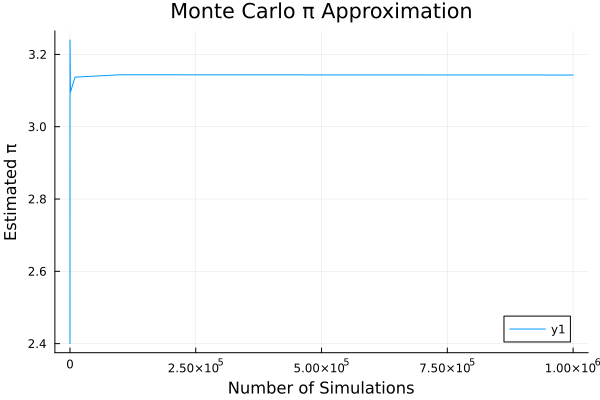

In [40]:
#Import packages
using Random
using Plots
using Statistics

#Creating function to simulate pi
function pi_approximation(num_simulations)
    inside_circle = 0
    for _ in 1:num_simulations
        x, y = rand(), rand()
        if x^2 + y^2 <= 1.0
            inside_circle += 1
        end
    end
    return 4 * inside_circle / num_simulations
end

# Running first siulation
k_values = [1, 2, 3, 4, 5, 6]
num_simulations_values = 10 .^ k_values
pi_estimates = [pi_approximation(num_simulations) for num_simulations in num_simulations_values]

plot(num_simulations_values, pi_estimates, xlabel="Number of Simulations", ylabel="Estimated π",
     title="Monte Carlo π Approximation")

# Second simulation. 1000 times previous simulation

In [45]:
quantiles = [0.05, 0.95]
k_values = [1, 2, 3, 4, 5]
num_simulations_values = 1000 .* 10 .^ k_values

quantile_data_5th = []
quantile_data_95th = []
mean_data = []

for num_simulations in num_simulations_values
    estimates = [pi_approximation(num_simulations) for _ in 1:1000]
    push!(quantile_data_5th, quantile(estimates, 0.05))
    push!(quantile_data_95th, quantile(estimates, 0.95))
    push!(mean_data, mean(estimates))
end

## Results

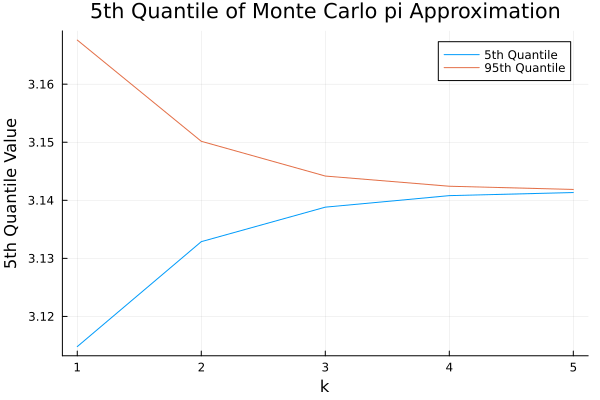

In [49]:
plot(k_values, quantile_data_5th, xlabel="k", ylabel="5th Quantile Value", label="5th Quantile",
     title="5th Quantile of Monte Carlo pi Approximation")
plot!(k_values, quantile_data_95th, label="95th Quantile")

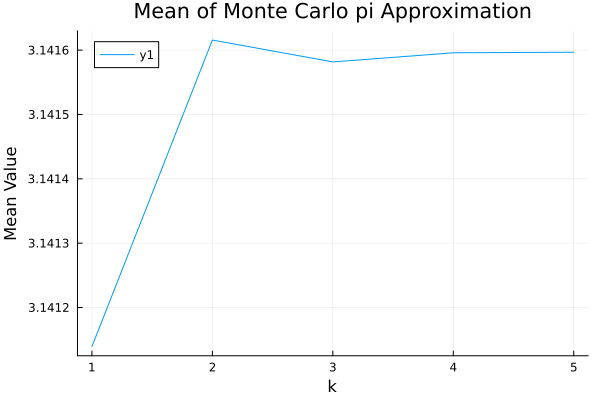

In [50]:
plot(k_values, mean_data, xlabel="k", ylabel="Mean Value",
     title="Mean of Monte Carlo pi Approximation")